In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import os
pathorig = '/Users/raiziel/'
os.chdir(pathorig) 

In [42]:
# Initial Conditions
L1 = 1.0 # Pendulum rod length(m)
m1 = 1.0 # mass of pendulum bob (kg)
L2 = 1.0
m2 = 1.0
w = 1.0 # drive frequency(s-1)
A = 1.0 # drive amplitude(m)
g = 9.81 # gravity(m/s^2)
alpha = .223 # damping coefficient
Th1 = 2.4
Th2 = 2.6
y0 = np.array([Th1, 0, Th2, 0]) # Initial Conditions; theta, dtheta/dt 
tmax, dt = 30, 0.01 # Maximum Time, Time Point Spacing (s) 30 seconds
t = np.arange(0, tmax+dt, dt) # Time Grid(s)

# Small changes in intial conditions
dz = 1e-4   # change in ztheta
dw = .8   # change in drive frequency
dA = .5  # change in drive amplitude
dalpha = 0.330 # change in damping coefficient
zTh1= Th1+dz
zTh2 = Th2
z0 = np.array([zTh1, 0, zTh2, 0]) # Initial Conditions; ztheta, zdtheta/dt
w = w + dw
A = A + dA    
alpha = alpha + dalpha

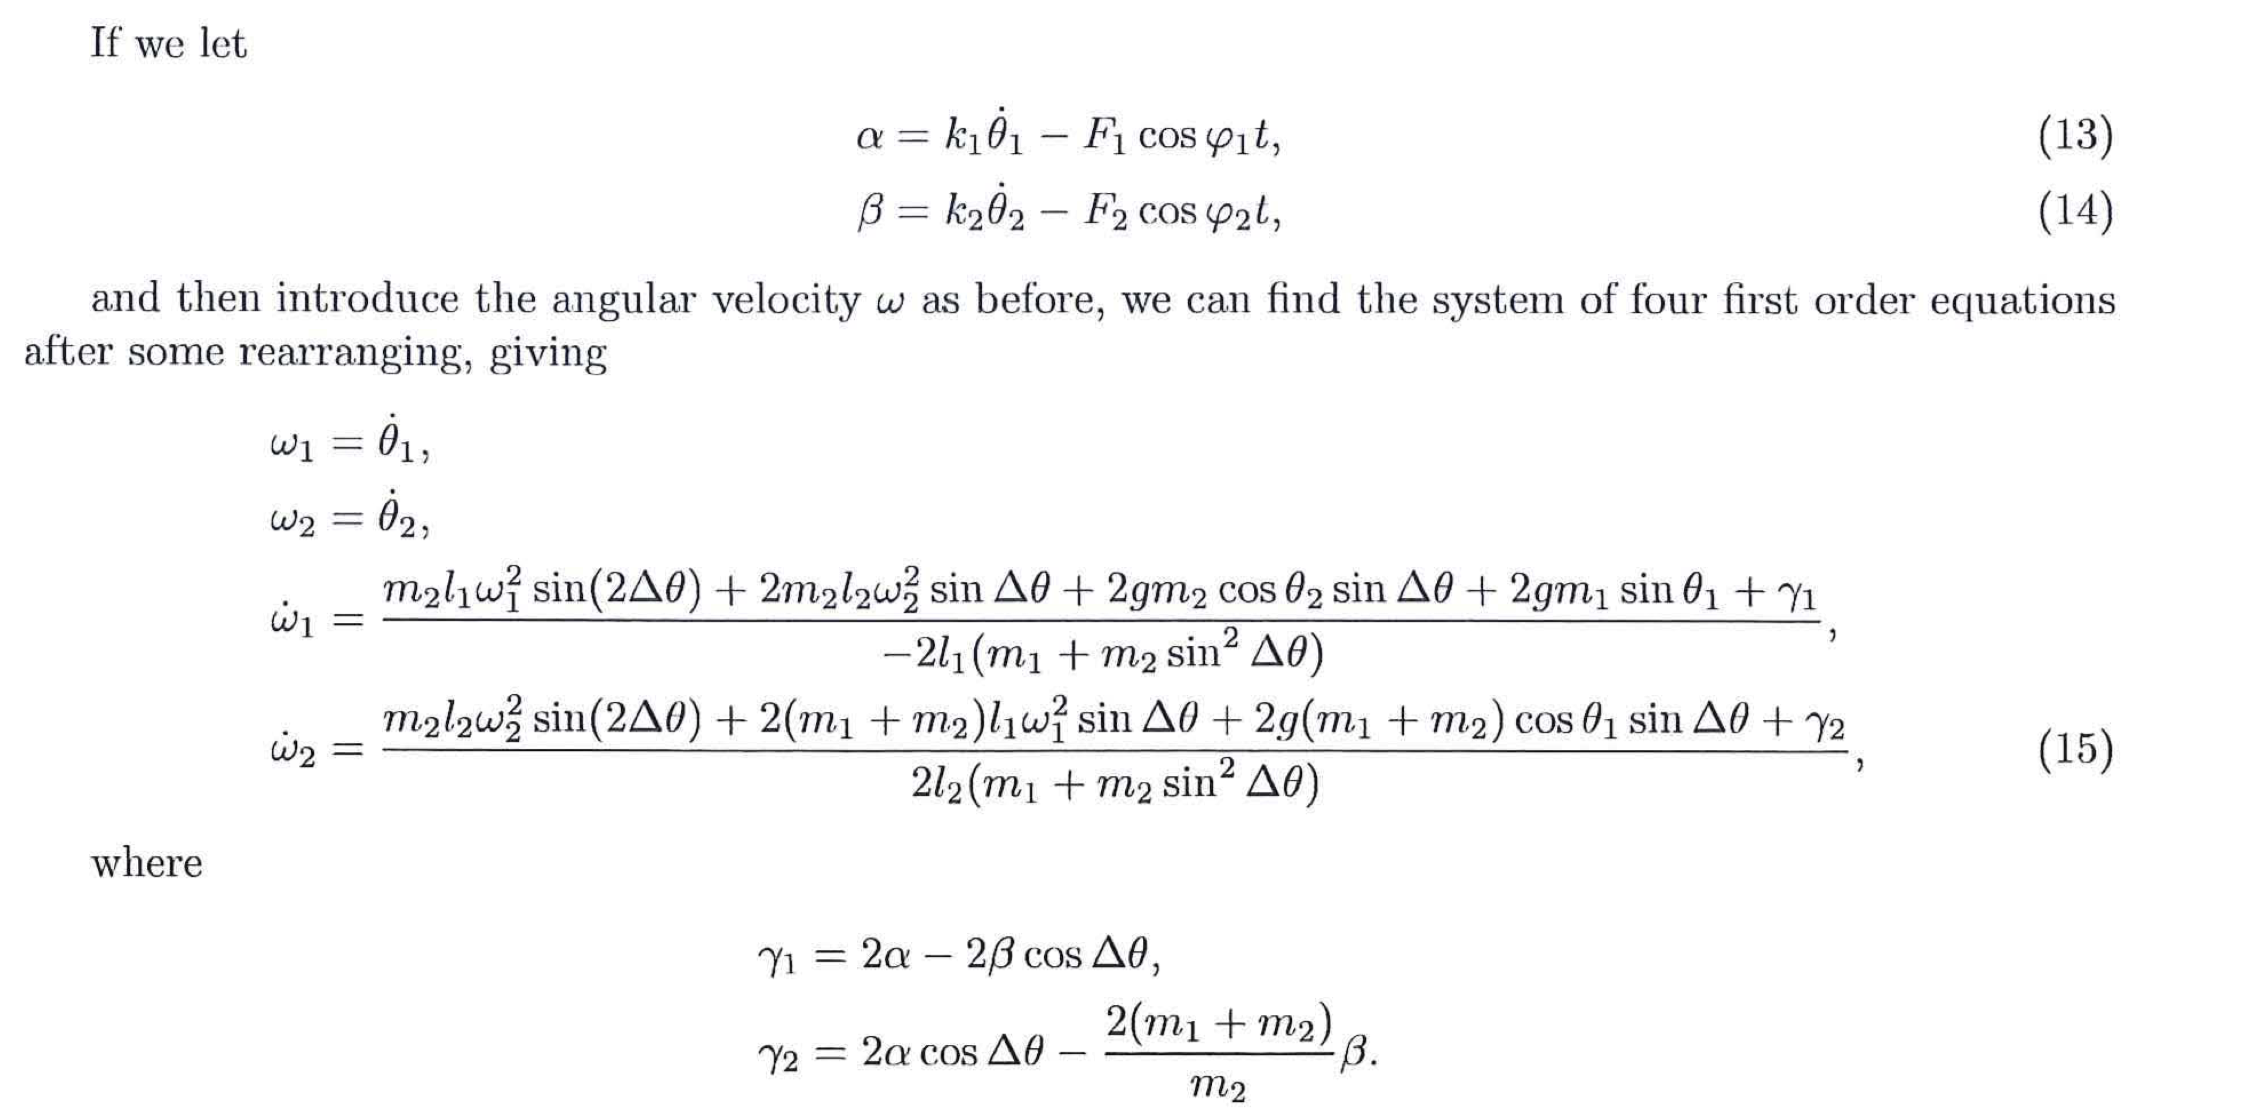

In [51]:
def deriv(y, t, L1, L2, m1, m2):
    """Return the first derivatives of y = theta1, z1, theta2, z2."""
    #initial conditions
    theta1, theta1dot, theta2, theta2dot = y
    deltatheta = (theta1-theta2)
    # cos(Δθ), sin(Δθ), cos(2Δθ), sin(Δθ)
    ct1 = np.cos(theta1) # cos(θ1)
    ct2 = np.cos(theta2) # cos(θ2)
    st1 = np.sin(theta1) # sin(θ1)
    st2 = np.sin(theta2) # sin(θ2)
    c1 = np.cos(deltatheta) # sin(Δθ)
    s1 = np.sin(deltatheta) # sin(Δθ)
    c2 = np.cos(2*deltatheta) # cos^2(Δθ)
    s2 = np.sin(2*deltatheta) # sin(2Δθ)
    s3 = np.sin(deltatheta)**2 # sin^2(Δθ)
    
    # Re-expressing dtheta1_dt / dtheta2_dt as variable z1,z2
    # Purpose of this is to set the problem as a 1st order ODE rather than 2nd order ODE
    z1 = theta1dot
    z2 = theta2dot
    #
    e1 = alpha*z1 - A*np.cos(w*t) #α alpha = k = damping coefficient for both
    e2 = alpha*z2 - A*np.cos(w*t) #β
    g1 = 2*e1-(2*e2*c1) # γ1
    g2 = 2*e1*np.cos(deltatheta)-((2*(m1+m2)*e2)/m2) # γ2
    
    z1dot = (m2*L1*(w**2)*s2+2*m2*L2*(w**2)*s1+2*g*m2*ct2*s1+2*g*m1*st1+g1)/(-2*L1*(m1+m2*s3))
    
    
    z2dot = (m2*L2*(w**2)*s2+2*(m1+m2)*L1*(w**2)*s1+2*g(m1+m2)*ct1*s1 +g2)/(2*L2*(m1+m2*s3))
    
    return theta1dot, z1dot, theta2dot, z2dot

def calc_E(y):
    """Return the total energy of the system."""

    th1, th1d, th2, th2d = y.T
    V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
    T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 +
            2*L1*L2*th1d*th2d*np.cos(th1-th2))
    return T + V




# Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0])

# Do the numerical integration of the equations of motion
y = odeint(deriv, y0, t, args=(L1, L2, m1, m2))

# Maximum time, time point spacings and the time grid (all in s).
tmax, dt = 30, 0.01
t = np.arange(0, tmax+dt, dt)
# Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
# radians
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0])

# Do the numerical integration of the equations of motion
y = odeint(deriv, y0, t, args=(L1, L2, m1, m2))

# Check that the calculation conserves total energy to within some tolerance.
EDRIFT = 0.05
# Total energy from the initial conditions
E = calc_E(y0)
if np.max(np.sum(np.abs(calc_E(y) - E))) > EDRIFT:
    sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

# Unpack z and theta as a function of time
theta1, theta2 = y[:,0], y[:,2]


plt.plot(y)
plt.xlabel('time, t(s)')
plt.ylabel('ΔΦ(t)')
#print(y[:,0])

TypeError: 'float' object is not callable